In [1]:
from Utilities import Feature_importance
import pandas as pd
import numpy as np

In [2]:
final_df = pd.read_csv('./0803Data/0803_Final_video_data.csv',encoding='utf-16')

In [3]:
final_df.columns.tolist()

['project_id',
 'project_launched_at',
 'project_deadline',
 'project_goal',
 'project_category',
 'date',
 'days_to_go',
 'pledged',
 'options_number',
 'title_count',
 'blurb_count',
 'content_text_length',
 'content_img_count',
 'faq_count',
 'update_count',
 'comment_count',
 'backers',
 'video_name',
 'cancel_check',
 'project_title',
 'project_blurb',
 'backed_count',
 'created_count',
 'num_crawl',
 'duration',
 'diff',
 'success',
 'backer1',
 'backer2',
 'backer3',
 'ratio1',
 'ratio2',
 'ratio3',
 'top_category',
 'super_category',
 'video_duration']

In [4]:
Analysis_df = final_df[['duration','project_goal','video_duration','update_count','project_blurb','faq_count',\
    'created_count','backed_count','ratio1','ratio2','ratio3','backer1','backer2','backer3','success']]

In [5]:
# Project_blurb
Analysis_df['project_blurb'] = Analysis_df['project_blurb'].apply(lambda x : len(x))
# Backed_count
Analysis_df['backed_count'] = Analysis_df['backed_count'].apply(lambda x : 0 if x =='None' else x)
Analysis_df['backed_count'] = Analysis_df['backed_count'].apply(lambda x : float(x))

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

## Feature importance

In [9]:
Analysis_df.shape
imporntace_model = Feature_importance.feature_importance(Analysis_df,'success',scaler='std')

### Chi-squre

In [10]:
imporntace_model.chisquare()

Feature ranking:
Rank : 1 	 Feature : update_count (15.317981)
Rank : 2 	 Feature : faq_count (10.377085)
Rank : 3 	 Feature : backer3 (10.332657)
Rank : 4 	 Feature : backer2 (9.965547)
Rank : 5 	 Feature : created_count (9.796692)
Rank : 6 	 Feature : backer1 (9.301047)
Rank : 7 	 Feature : project_goal (6.429365)
Rank : 8 	 Feature : backed_count (3.315244)
Rank : 9 	 Feature : duration (3.156638)
Rank : 10 	 Feature : ratio3 (1.825219)
Rank : 11 	 Feature : ratio1 (1.816641)
Rank : 12 	 Feature : ratio2 (1.666440)
Rank : 13 	 Feature : project_blurb (0.167015)
Rank : 14 	 Feature : video_duration (0.117610)


### Random forest

/Users/yonggeol/workspace/Kickstarter/Utilities/Feature_importance.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x, self.y)


Feature ranking:
Rank : 0 	 Feature : ratio3 (0.281593)
Rank : 1 	 Feature : ratio1 (0.251222)
Rank : 2 	 Feature : backer2 (0.220569)
Rank : 3 	 Feature : ratio2 (0.103441)
Rank : 4 	 Feature : update_count (0.062007)
Rank : 5 	 Feature : project_goal (0.050758)
Rank : 6 	 Feature : backer1 (0.022921)
Rank : 7 	 Feature : backer3 (0.004767)
Rank : 8 	 Feature : video_duration (0.002723)
Rank : 9 	 Feature : backed_count (0.000000)
Rank : 10 	 Feature : created_count (0.000000)
Rank : 11 	 Feature : faq_count (0.000000)
Rank : 12 	 Feature : project_blurb (0.000000)
Rank : 13 	 Feature : duration (0.000000)


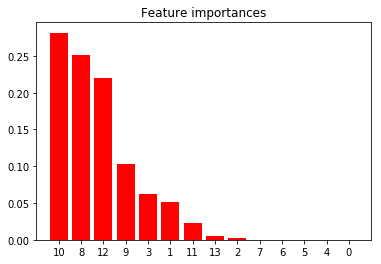

In [11]:
imporntace_model.random_forest()

### Logistic regression

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Feature ranking:
Rank : 1 	 Feature : project_goal (100.000000)
Rank : 2 	 Feature : backer3 (42.628915)
Rank : 3 	 Feature : backer2 (36.342447)
Rank : 4 	 Feature : backer1 (24.212619)
Rank : 5 	 Feature : ratio3 (20.031925)
Rank : 6 	 Feature : ratio1 (18.264605)
Rank : 7 	 Feature : update_count (17.925870)
Rank : 8 	 Feature : ratio2 (15.784114)
Rank : 9 	 Feature : duration (10.972082)
Rank : 10 	 Feature : created_count (5.528943)
Rank : 11 	 Feature : faq_count (5.471820)
Rank : 12 	 Feature : project_blurb (4.694817)
Rank : 13 	 Feature : backed_count (2.892277)
Rank : 14 	 Feature : video_duration (2.608301)


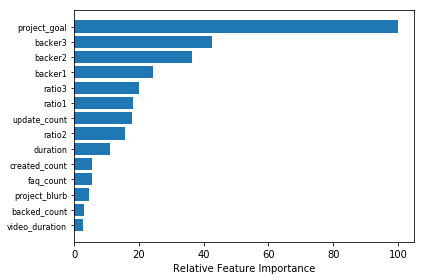

In [12]:
imporntace_model.logistic_regression()

In [15]:
pd.read_csv('./0803Data/0803_Final_filtered_df.csv',encoding='utf-16')

,project_id,project_title,project_blurb,super_category,success,duration
0,669731968,THE GAME MASTER KIT COLLECTION - RELOADED,An All-in-one gaming collection. Premium metal...,Games,success,221.240000
1,475119411,Red Rock Recollections: Fascinating Stories Ab...,Compilation books of historical feature storie...,Publishing,success,245.211633
2,149769944,Adventure Realm RPG Tiles - Cave and Cavern set,"Go underground with these 16 double sided, ful...",Games,success,101.080000
3,1883635834,"CITIZENS. Play the game, See the world.",Do you love to travel ? Do you like games ? .....,Games,success,131.520000
4,419752392,Shepherd Lock: Keyless entry technology for yo...,"Shepherd allows for convenient entry, guest ac...",Design & Tech,success,171.671500
5,984971063,Codename Colossus T-19A Iron Cavalry mechanize...,The T-19A Iron Cavalry is a 1/35 scale mechani...,Games,success,201.734867
6,550938272,Children's Book: Anthony Fox Does Not Believe ...,A clever fox matches wits with ghosts in a hau...,Publishing,success,148.333333
7,37357434,Torg Eternity - Aysle,Aysle continues the Possibility War started in...,Games,success,101.200000
8,2039796511,15 Seconds of Shame,A short film about the renaissance of public s...,Film,success,145.845700
9,1787153077,Luke Mitchem is creating a new album!,"""Which Wolf Will You Feed?"" - The sixth studio...",Music,success,84.680000
